---

# Predicting Survival on the Titanic

## 1. Data Exploration and Preprocessing

### Data Loading
The dataset is initially loaded into memory using pandas, a powerful data analysis library in Python. This step allows us to inspect the structure and content of the dataset.

### Data Description
The Titanic dataset contains information on passengers, including:
- **PassengerId**: Unique identifier for each passenger
- **Pclass**: Ticket class (1st, 2nd, 3rd)
- **Name**: Passenger's name
- **Sex**: Passenger's gender
- **Age**: Passenger's age
- **SibSp**: Number of siblings/spouses aboard
- **Parch**: Number of parents/children aboard
- **Ticket**: Ticket number
- **Fare**: Passenger fare
- **Cabin**: Cabin number
- **Survived**: Survival status (0 = No, 1 = Yes)

### Data Cleaning
Before analysis, the dataset undergoes cleaning to handle missing values and remove unnecessary columns. Missing values may be imputed or dropped based on the analysis of their impact on the model.

### Feature Engineering
Feature engineering involves creating new features or transforming existing ones to enhance predictive power. For instance, extracting titles (Mr., Mrs., etc.) from names can provide additional insights into social status.

### Exploratory Data Analysis (EDA)
EDA involves visualizing data distributions and relationships between variables. This step helps in understanding the dataset's characteristics and identifying patterns that may influence survival.

## 2. Model Training and Evaluation Workflow

### Data Preprocessing
Data preprocessing prepares the dataset for modeling by:
- Scaling numerical features to a standard range using StandardScaler.
- Encoding categorical features like 'Sex' and 'Embarked' using OneHotEncoder.

### Model Definition and Training
Multiple machine learning models are defined and trained using scikit-learn. For example, a RandomForestClassifier is trained to predict survival based on preprocessed features.

### Model Evaluation
Model performance is evaluated using various metrics:
- **Accuracy**: Overall correctness of predictions.
- **Precision**: Proportion of true positive predictions among all positive predictions.
- **Recall**: Proportion of true positive predictions among all actual positives.
- **Confusion Matrix**: Summarizes the performance of a classification model.

## 3. Results Interpretation

### Feature Importance
Analyzing feature importance helps in understanding which factors (e.g., age, gender, ticket class) most influence survival predictions. This insight guides further model refinement and feature selection.

### Model Comparison
Comparing the performance of different models (e.g., RandomForest, Logistic Regression) provides insights into their strengths and weaknesses. Factors such as computational efficiency and interpretability are considered.

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [5]:
  # Load the CSV files
titanic_df = pd.read_csv("titanic.csv")

In [79]:
# Select relevant features and the target
titanic_df.count()

PassengerId     801
Survived        889
Pclass          889
Name            801
Sex             889
Age             889
SibSp           889
Parch           889
Ticket          801
Fare            889
Cabin           889
Embarked        889
Title           801
FamilySize      889
AgeGroup        889
FareCategory    876
dtype: int64

In [6]:
X = titanic_df.drop('Survived', axis=1)
y = titanic_df['Survived']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

In [13]:
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [14]:
#Combine the transformers into a single column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [15]:
# model pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])
# Fit the pipeline (including preprocessing) to the training data
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object'))])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [22]:
param_grid = {
    'classifier__n_estimators': [50, 100],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5]
}

# Cross-validation method
cv = StratifiedKFold(n_splits=5, shuffle=True)
# train the pipeline model
model = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=cv, scoring='accuracy', verbose=2)
model.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END classifier__max_depth=None, classifier__min_samples_split=2, classifier__n_estimators=50; total time=   0.7s
[CV] END classifier__max_depth=None, classifier__min_samples_split=2, classifier__n_estimators=50; total time=   1.5s
[CV] END classifier__max_depth=None, classifier__min_samples_split=2, classifier__n_estimators=50; total time=   1.7s
[CV] END classifier__max_depth=None, classifier__min_samples_split=2, classifier__n_estimators=50; total time=   0.6s
[CV] END classifier__max_depth=None, classifier__min_samples_split=2, classifier__n_estimators=50; total time=   0.6s
[CV] END classifier__max_depth=None, classifier__min_samples_split=2, classifier__n_estimators=100; total time=   1.1s
[CV] END classifier__max_depth=None, classifier__min_samples_split=2, classifier__n_estimators=100; total time=   0.8s
[CV] END classifier__max_depth=None, classifier__min_samples_split=2, classifier__n_estimators=100; total time=

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         Index(['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')),
                                                                        ('cat',
                                                                         Pipeline(steps=[('i...
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object'))])),
                                       ('classifier',
                                        RandomForestClassifier(random_state=42))]),
             param_grid={'classifier__max_depth': [None, 10, 20],
                         'classifier__min_samples_split': [2, 5],
                         'classifier__n_estimators': [50, 100]},
             scoring='accuracy', verbose=2)

In [23]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.90      0.84       105
           1       0.82      0.68      0.74        74

    accuracy                           0.80       179
   macro avg       0.81      0.79      0.79       179
weighted avg       0.81      0.80      0.80       179



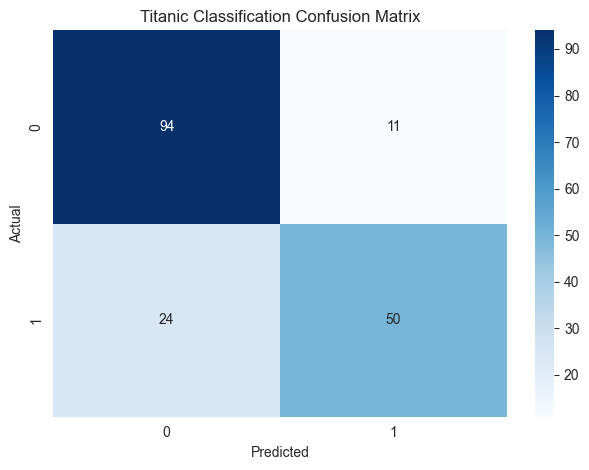

In [24]:
# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure()
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')

# Set the title and labels
plt.title('Titanic Classification Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Show the plot
plt.tight_layout()
plt.show()

In [25]:
# Feature importance
model.best_estimator_['preprocessor'].named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(categorical_features)

array(['Name_Abbott, Mr. Rossmore Edward',
       'Name_Abbott, Mrs. Stanton (Rosa Hunt)',
       'Name_Abelson, Mr. Samuel', ..., 'Embarked_C', 'Embarked_Q',
       'Embarked_S'], shape=(1392,), dtype=object)

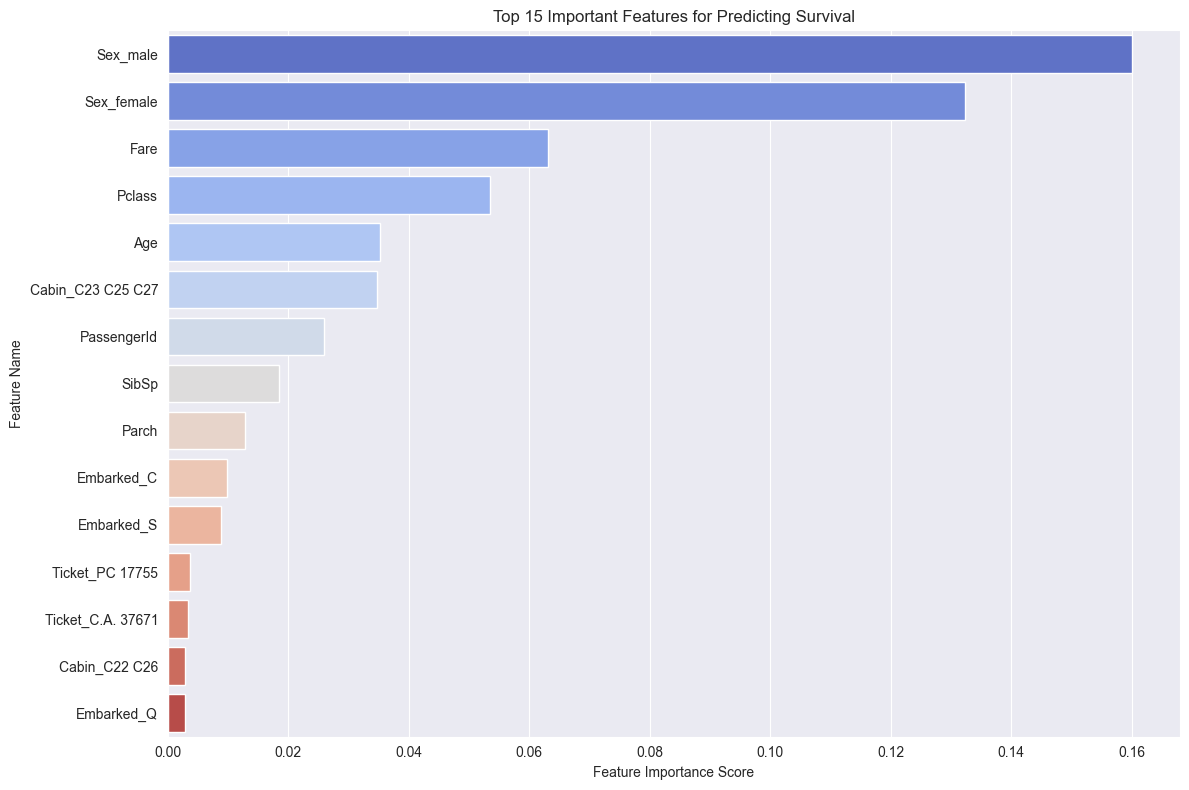


Test set accuracy: 80.45%


In [30]:
# Get feature importances from Random Forest
feature_importances = model.best_estimator_.named_steps['classifier'].feature_importances_

# Get one-hot encoder
onehot = model.best_estimator_.named_steps['preprocessor'] \
                              .named_transformers_['cat'] \
                              .named_steps['onehot']

# Combine numerical and one-hot encoded categorical feature names
feature_names = list(numerical_features) + list(onehot.get_feature_names_out(categorical_features))

# Create DataFrame
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(12, 8))
sns.barplot(data=importance_df.head(15), y='Feature', x='Importance', palette='coolwarm')
plt.title('Top 15 Important Features for Predicting Survival')
plt.xlabel('Feature Importance Score')
plt.ylabel('Feature Name')
plt.tight_layout()
plt.show()

# Accuracy
test_score = model.score(X_test, y_test)
print(f"\nTest set accuracy: {test_score:.2%}")




# Data Exploration

In [31]:
titanic_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [9]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<Figure size 800x500 with 0 Axes>

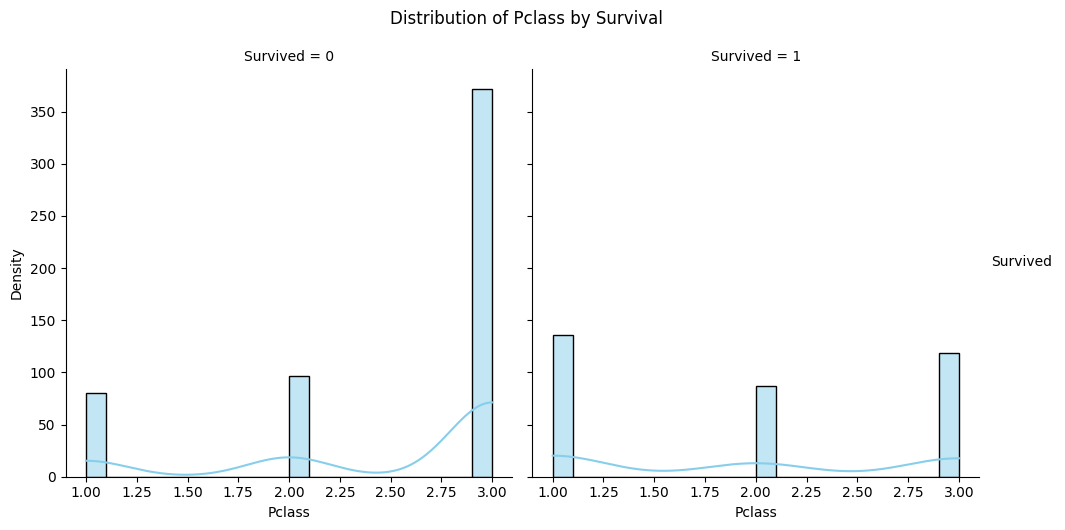

<Figure size 800x500 with 0 Axes>

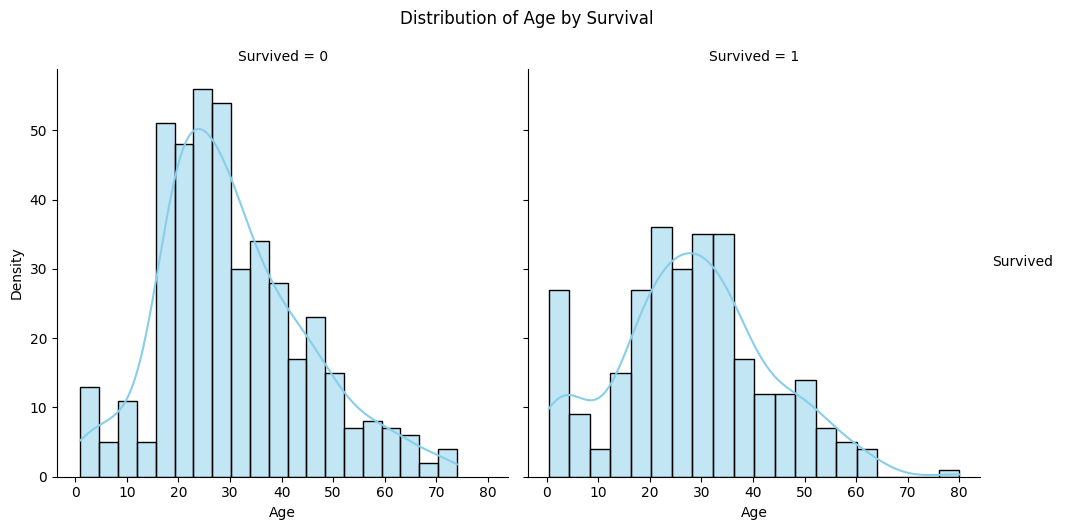

<Figure size 800x500 with 0 Axes>

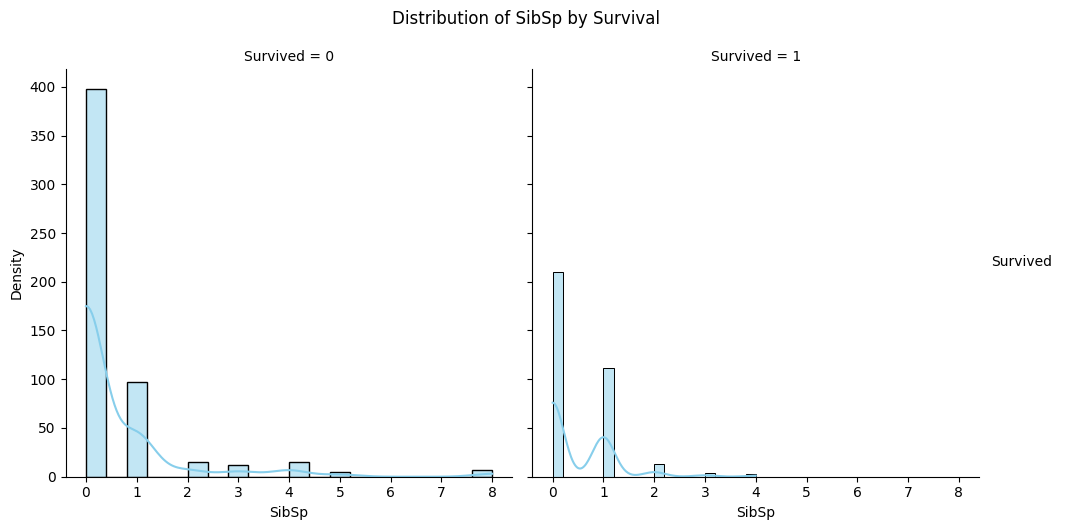

<Figure size 800x500 with 0 Axes>

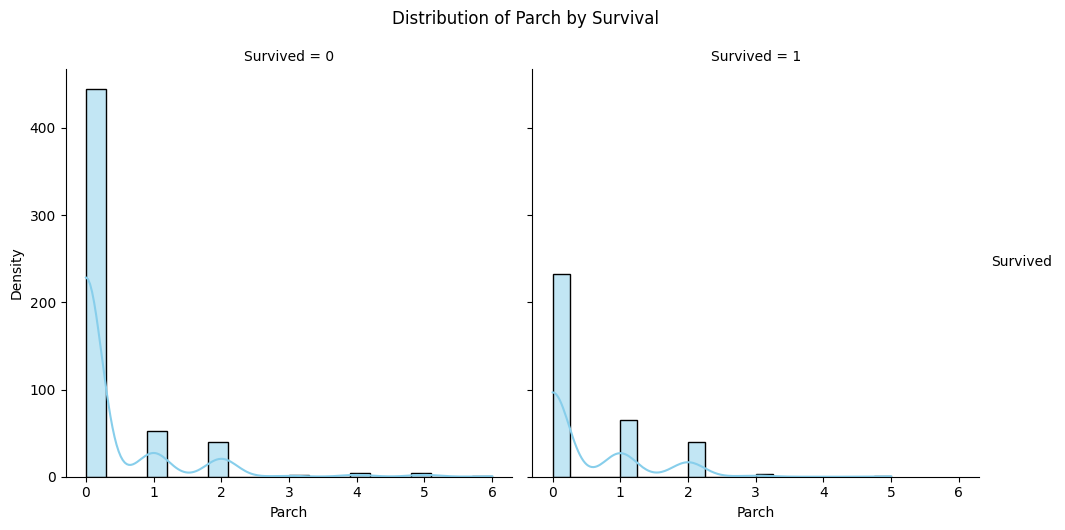

<Figure size 800x500 with 0 Axes>

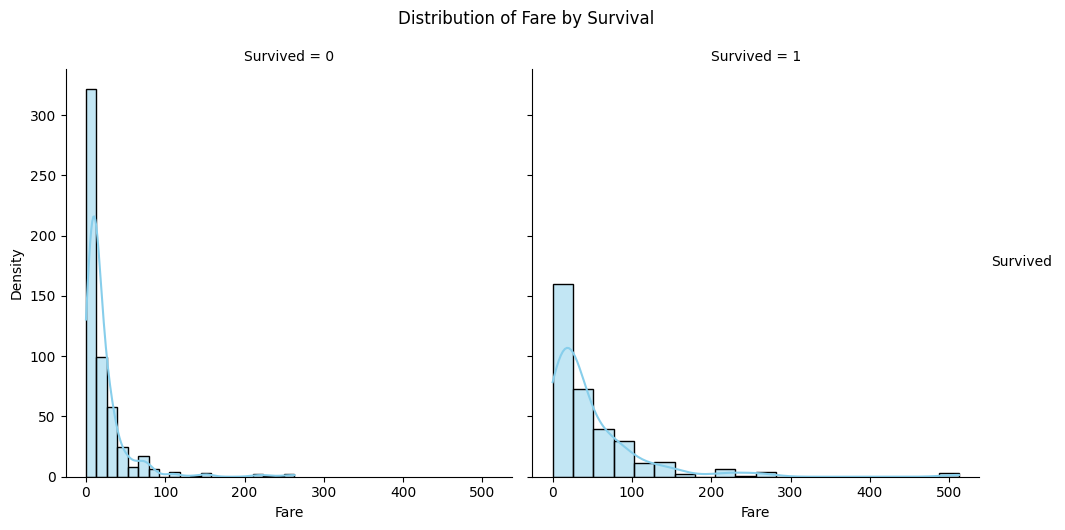

In [12]:
numerical_cols = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
for col in numerical_cols:
    plt.figure(figsize=(8, 5))
    g = sns.FacetGrid(titanic_df, col="Survived", height=5)
    g.map_dataframe(sns.histplot, x=col, kde=True, bins=20, color='skyblue')
    g.set_axis_labels(col, 'Density')
    g.add_legend(title='Survived')
    plt.suptitle(f'Distribution of {col} by Survival', y=1.05)
    plt.show()


In [13]:
numeric_df = titanic_df.select_dtypes(include='number')

In [14]:
corr_matrix = numeric_df.corr()

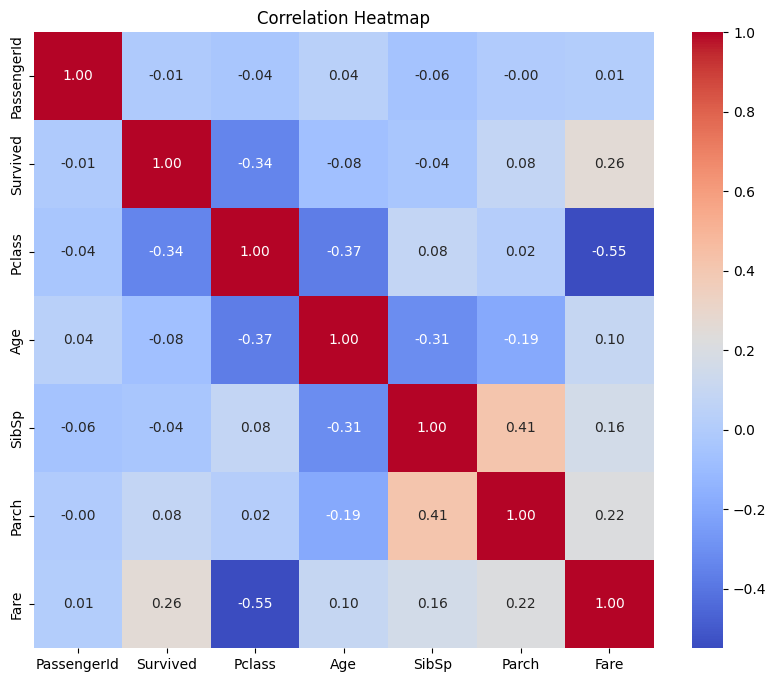

In [15]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [16]:
embarked_missing = titanic_df['Embarked'].isnull().sum()
embarked_missing

np.int64(2)

In [18]:
embarked_encoded = pd.get_dummies(titanic_df['Embarked'], prefix='Embarked', drop_first=True)


In [19]:
encoded_df = pd.concat([titanic_df, embarked_encoded], axis=1)


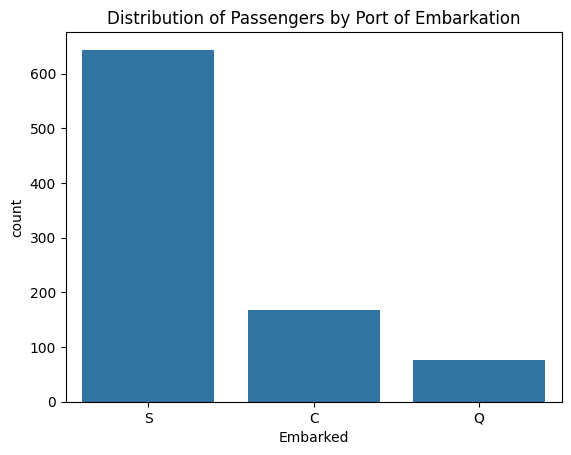

In [20]:
sns.countplot(x='Embarked', data=titanic_df)
plt.title('Distribution of Passengers by Port of Embarkation')
plt.show()

In [21]:
missing_age = titanic_df['Age'].isnull().sum()
missing_age

np.int64(177)

In [22]:
mean_age = titanic_df['Age'].mean()
titanic_df['Age'].fillna(mean_age, inplace=True)

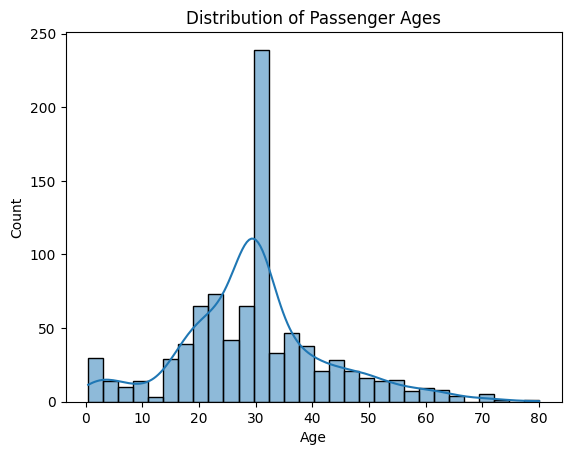

In [23]:
sns.histplot(data=titanic_df, x='Age', kde=True)
plt.title('Distribution of Passenger Ages')
plt.xlabel('Age')
plt.show()

In [27]:
missing_cabin = titanic_df['Cabin'].isnull().sum
missing_cabin

<bound method Series.sum of 0       True
1      False
2       True
3      False
4       True
       ...  
886     True
887    False
888     True
889    False
890     True
Name: Cabin, Length: 891, dtype: bool>

In [24]:
titanic_df['Cabin'].fillna('Unknown', inplace=True)

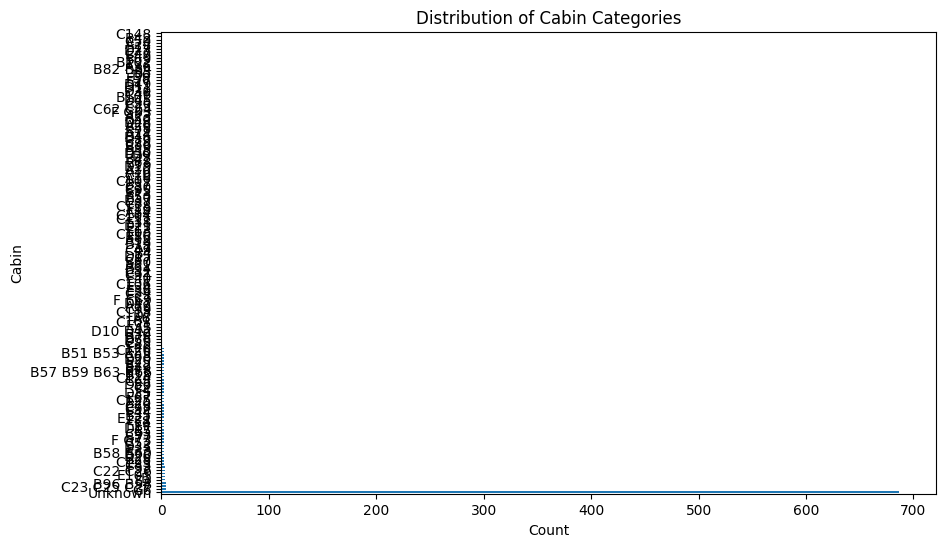

In [25]:
plt.figure(figsize=(10, 6))
cabin_counts = titanic_df['Cabin'].value_counts()
cabin_counts.plot(kind='barh')
plt.title('Distribution of Cabin Categories')
plt.xlabel('Count')
plt.ylabel('Cabin')
plt.show()

Text(0.5, 1.0, 'Passenger Class Distribution')

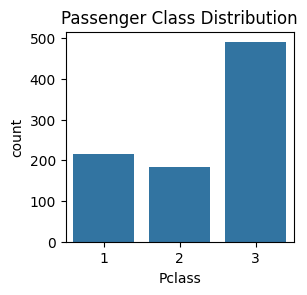

In [26]:
plt.figure(figsize=(10, 6))
plt.subplot(2, 3, 1)
sns.countplot(data=titanic_df, x='Pclass')
plt.title('Passenger Class Distribution')

Text(0.5, 1.0, 'Sex Distribution')

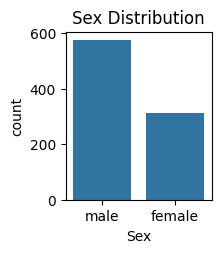

In [27]:
plt.subplot(2, 3, 2)
sns.countplot(data=titanic_df, x='Sex')
plt.title('Sex Distribution')

Text(0.5, 1.0, 'Age Distribution')

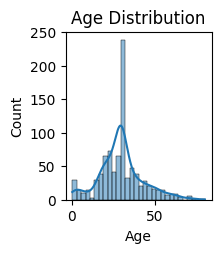

In [28]:
plt.subplot(2, 3, 3)
sns.histplot(data=titanic_df, x='Age', kde=True)
plt.title('Age Distribution')

Text(0.5, 1.0, 'Siblings/Spouses Distribution')

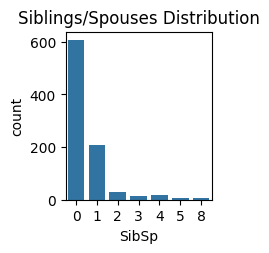

In [29]:
plt.subplot(2, 3, 4)
sns.countplot(data=titanic_df, x='SibSp')
plt.title('Siblings/Spouses Distribution')

Text(0.5, 1.0, 'Parents/Children Distribution')

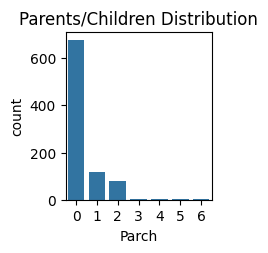

In [30]:
plt.subplot(2, 3, 5)
sns.countplot(data=titanic_df, x='Parch')
plt.title('Parents/Children Distribution')

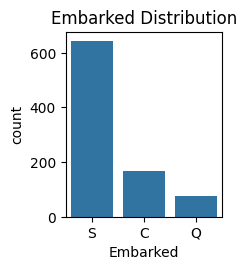

In [31]:
plt.subplot(2, 3, 6)
sns.countplot(data=titanic_df, x='Embarked')
plt.title('Embarked Distribution')

plt.tight_layout()
plt.show()

# pivot tables for categorical variables and compare them against the "Survived" column. 
Let's do this for the ***"Sex", "Pclass", and "Embarked" columns:***

In [32]:
sex_pivot = titanic_df.pivot_table(index='Sex', values='Survived', aggfunc=np.mean)
sex_pivot

,Survived
Sex,
female,0.742038
male,0.188908


Text(0, 0.5, 'Survival Rate')

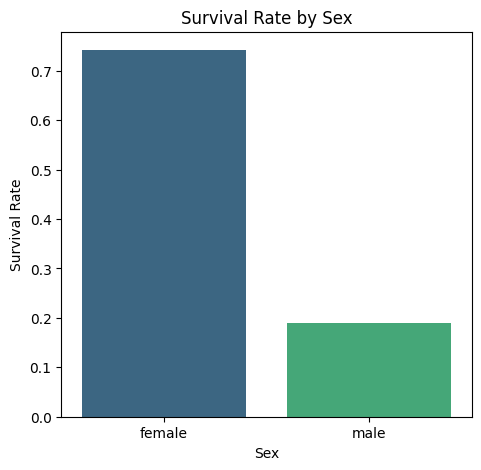

In [33]:
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.barplot(x=sex_pivot.index, y=sex_pivot['Survived'], palette='viridis')
plt.title('Survival Rate by Sex')
plt.xlabel('Sex')
plt.ylabel('Survival Rate')

In [34]:
pclass_pivot = titanic_df.pivot_table(index='Pclass', values='Survived', aggfunc=np.mean)
pclass_pivot

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


Text(0, 0.5, 'Survival Rate')

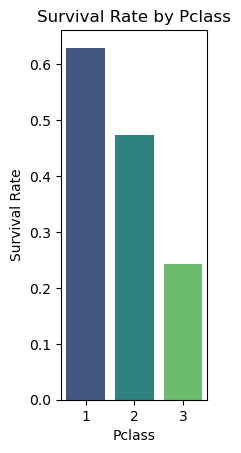

In [39]:
plt.subplot(1, 3, 2)
sns.barplot(x=pclass_pivot.index, y=pclass_pivot['Survived'], palette='viridis')
plt.title('Survival Rate by Pclass')
plt.xlabel('Pclass')
plt.ylabel('Survival Rate')


In [35]:
embarked_pivot = titanic_df.pivot_table(index='Embarked', values='Survived', aggfunc=np.mean)
embarked_pivot


,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


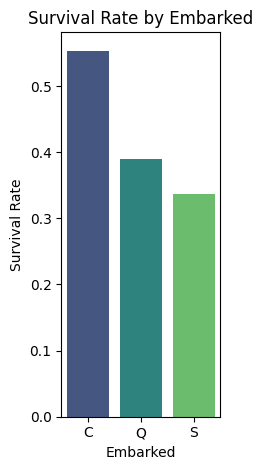

In [36]:
plt.subplot(1, 3, 3)
sns.barplot(x=embarked_pivot.index, y=embarked_pivot['Survived'], palette='viridis')
plt.title('Survival Rate by Embarked')
plt.xlabel('Embarked')
plt.ylabel('Survival Rate')

plt.tight_layout()
plt.show()

# Handling Missing Data

In [39]:
mean_age = titanic_df['Age'].mean()
titanic_df['Age'].fillna(mean_age, inplace=True)

In [40]:
titanic_df.dropna(subset=['Embarked'], inplace=True)

In [41]:
titanic_df['Age'].fillna(mean_age, inplace=True)

In [43]:
titanic_df.dropna(subset=['Embarked'], inplace=True)

Visualize the impact of the handling strategy on the dataset.
Check if the distribution of variables has changed after handling missing data.

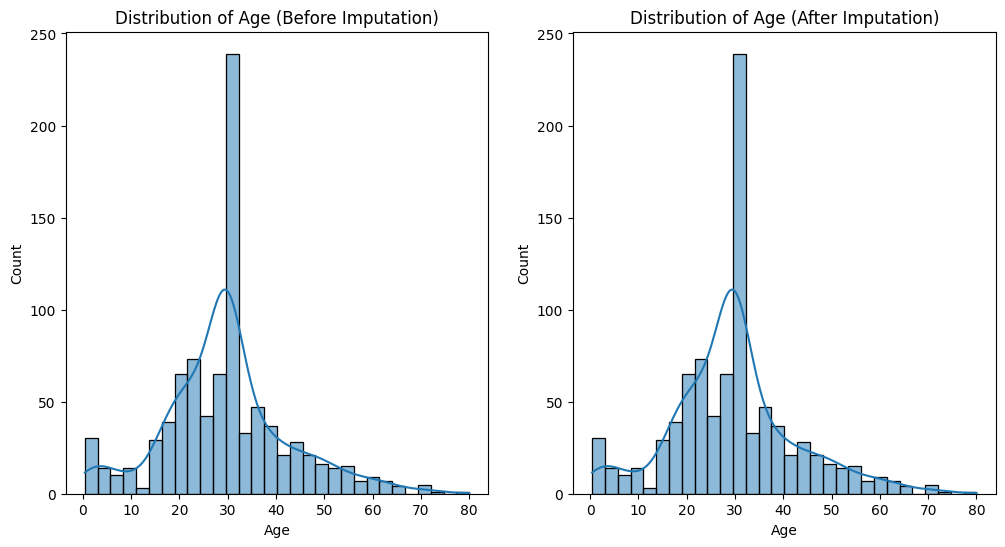

In [44]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(data=titanic_df, x='Age', kde=True)
plt.title('Distribution of Age (Before Imputation)')
plt.subplot(1, 2, 2)
sns.histplot(data=titanic_df, x='Age', kde=True)
plt.title('Distribution of Age (After Imputation)')
plt.show()

In [45]:
missing_values = titanic_df.isnull().sum()
missing_values

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [47]:
missing_percentage = 0.1 

In [48]:
num_missing = int(len(titanic_df) * missing_percentage)

In [49]:
missing_indices = np.random.choice(titanic_df.index, num_missing, replace=False)

In [50]:
columns_with_missing = np.random.choice(titanic_df.columns, int(titanic_df.shape[1] * 0.5), replace=False)

In [51]:
titanic_df.loc[missing_indices, columns_with_missing] = np.nan

In [52]:
columns_with_missing = titanic_df.columns[titanic_df.isnull().any()].tolist()
columns_with_missing


['PassengerId', 'Name', 'Age', 'SibSp', 'Ticket', 'Fare']

In [53]:
median_age = titanic_df['Age'].median()
titanic_df['Age'].fillna(median_age, inplace=True)

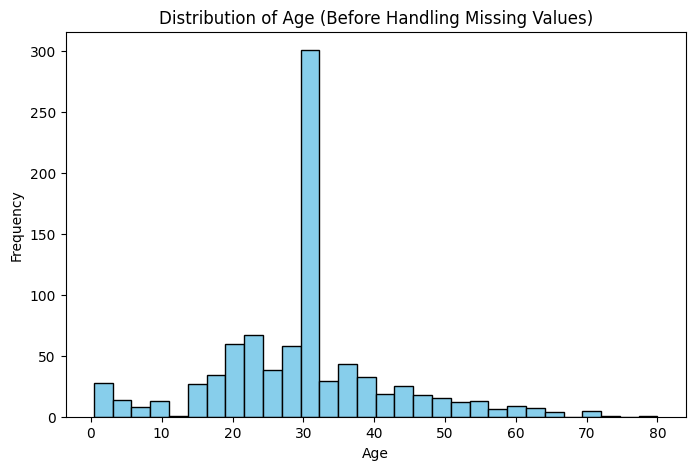

In [54]:
plt.figure(figsize=(8, 5))
plt.hist(titanic_df['Age'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Age (Before Handling Missing Values)')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


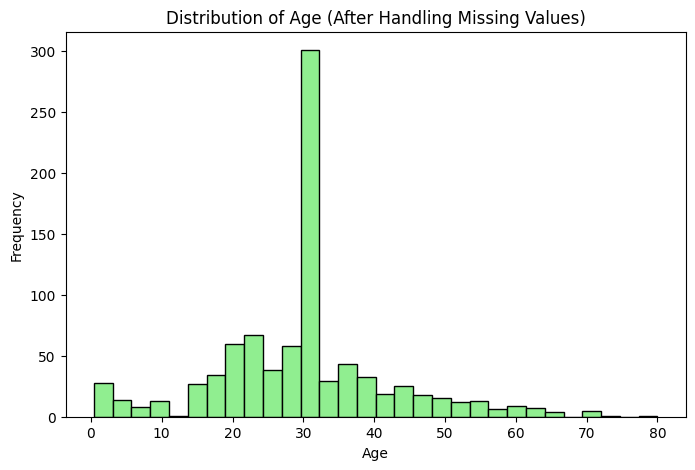

In [55]:
plt.figure(figsize=(8, 5))
plt.hist(titanic_df['Age'], bins=30, color='lightgreen', edgecolor='black')
plt.title('Distribution of Age (After Handling Missing Values)')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [57]:
titanic_df['SibSp'].fillna(0, inplace=True)

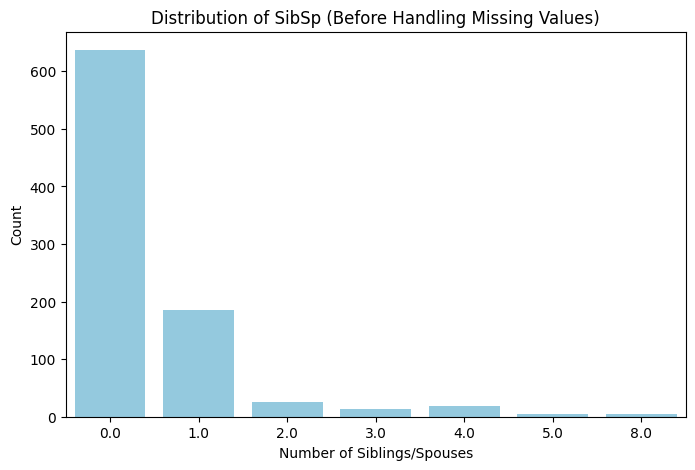

In [58]:
plt.figure(figsize=(8, 5))
sns.countplot(data=titanic_df, x='SibSp', color='skyblue')
plt.title('Distribution of SibSp (Before Handling Missing Values)')
plt.xlabel('Number of Siblings/Spouses')
plt.ylabel('Count')
plt.show()

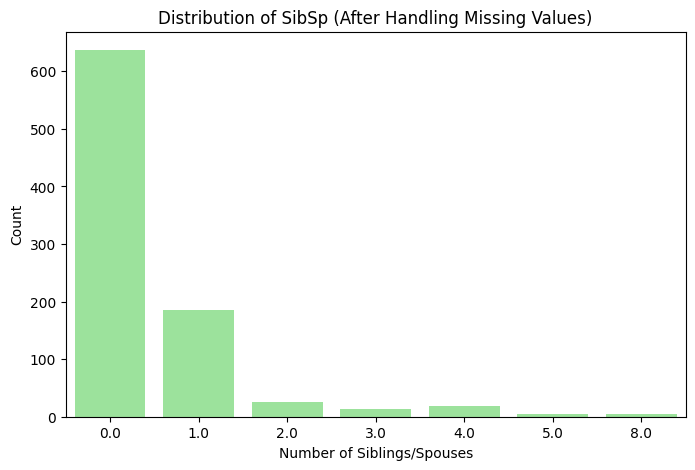

In [59]:
plt.figure(figsize=(8, 5))
sns.countplot(data=titanic_df, x='SibSp', color='lightgreen')
plt.title('Distribution of SibSp (After Handling Missing Values)')
plt.xlabel('Number of Siblings/Spouses')
plt.ylabel('Count')
plt.show()

In [60]:
median_fare = titanic_df['Fare'].median()
titanic_df['Fare'].fillna(median_fare, inplace=True)


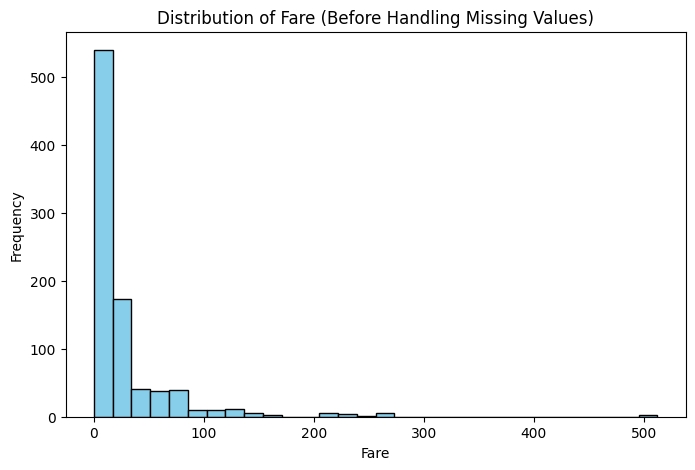

In [61]:
plt.figure(figsize=(8, 5))
plt.hist(titanic_df['Fare'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Fare (Before Handling Missing Values)')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()

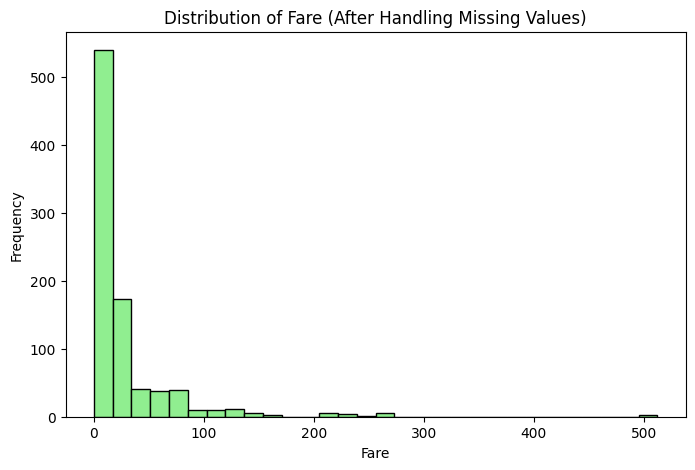

In [62]:
plt.figure(figsize=(8, 5))
plt.hist(titanic_df['Fare'], bins=30, color='lightgreen', edgecolor='black')
plt.title('Distribution of Fare (After Handling Missing Values)')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()

In [63]:
mode_embarked = titanic_df['Embarked'].mode()[0]
titanic_df['Embarked'].fillna(mode_embarked, inplace=True)

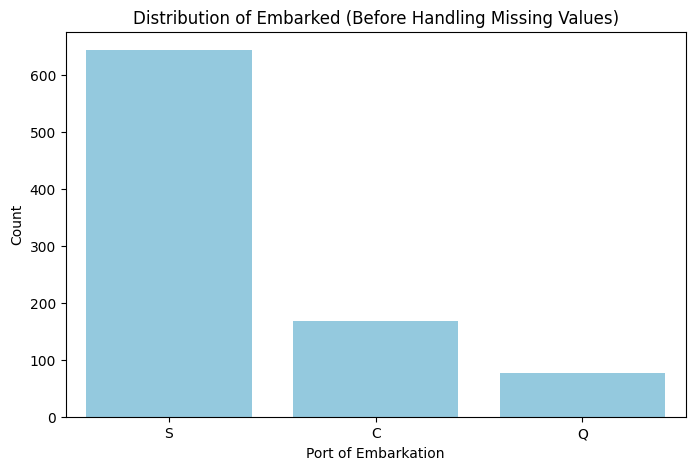

In [64]:
plt.figure(figsize=(8, 5))
sns.countplot(data=titanic_df, x='Embarked', color='skyblue')
plt.title('Distribution of Embarked (Before Handling Missing Values)')
plt.xlabel('Port of Embarkation')
plt.ylabel('Count')
plt.show()

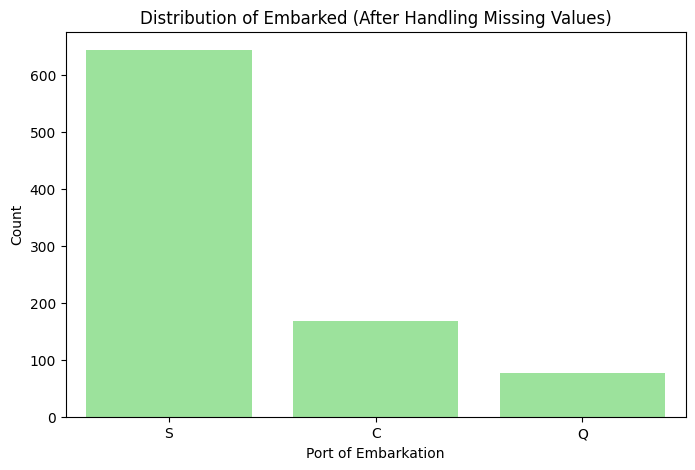

In [65]:
plt.figure(figsize=(8, 5))
sns.countplot(data=titanic_df, x='Embarked', color='lightgreen')
plt.title('Distribution of Embarked (After Handling Missing Values)')
plt.xlabel('Port of Embarkation')
plt.ylabel('Count')
plt.show()

# Feature Engineering

## Title Extraction from Name:
Extract titles (e.g., Mr., Mrs., Miss) from the 'Name' column and create a new feature 'Title'.

In [67]:
titanic_df['Title'] = titanic_df['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)
titanic_df


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1.0,0,3,"Braund, Mr. Owen Harris",male,22.000000,1.0,0,A/5 21171,7.2500,Unknown,S,Mr
1,2.0,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1.0,0,PC 17599,71.2833,C85,C,Mrs
2,3.0,1,3,"Heikkinen, Miss. Laina",female,26.000000,0.0,0,STON/O2. 3101282,7.9250,Unknown,S,Miss
3,4.0,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1.0,0,113803,53.1000,C123,S,Mrs
4,5.0,0,3,"Allen, Mr. William Henry",male,35.000000,0.0,0,373450,8.0500,Unknown,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887.0,0,2,"Montvila, Rev. Juozas",male,27.000000,0.0,0,211536,13.0000,Unknown,S,Rev
887,888.0,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0.0,0,112053,30.0000,B42,S,Miss
888,889.0,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1.0,2,W./C. 6607,23.4500,Unknown,S,Miss
889,NaN,1,1,NaN,male,29.699118,0.0,0,NaN,14.4000,C148,C,NaN


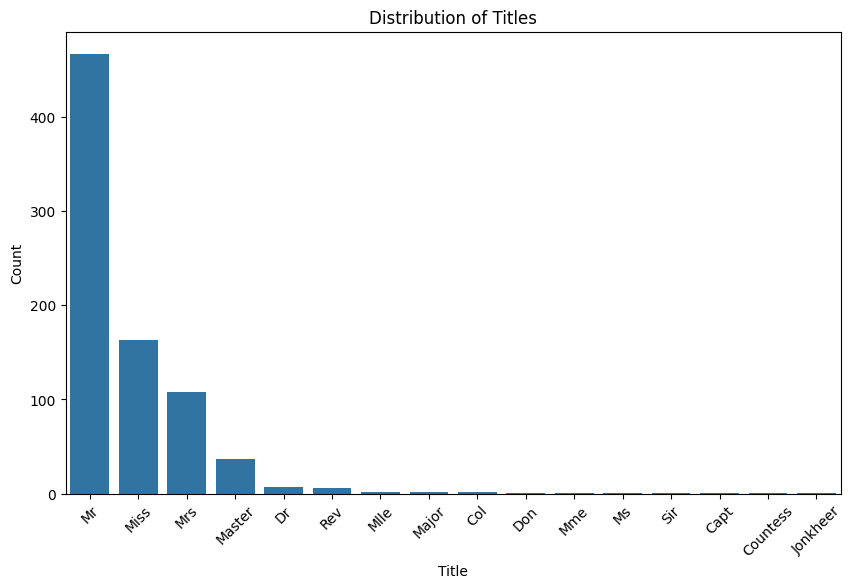

In [68]:
plt.figure(figsize=(10, 6))
sns.countplot(data=titanic_df, x='Title', order=titanic_df['Title'].value_counts().index)
plt.title('Distribution of Titles')
plt.xlabel('Title')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

## Family Size: 
Create a new feature 'FamilySize' by adding 'SibSp' and 'Parch' columns.

In [69]:
titanic_df['FamilySize'] = titanic_df['SibSp'] + titanic_df['Parch']
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,1.0,0,3,"Braund, Mr. Owen Harris",male,22.000000,1.0,0,A/5 21171,7.2500,Unknown,S,Mr,1.0
1,2.0,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1.0,0,PC 17599,71.2833,C85,C,Mrs,1.0
2,3.0,1,3,"Heikkinen, Miss. Laina",female,26.000000,0.0,0,STON/O2. 3101282,7.9250,Unknown,S,Miss,0.0
3,4.0,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1.0,0,113803,53.1000,C123,S,Mrs,1.0
4,5.0,0,3,"Allen, Mr. William Henry",male,35.000000,0.0,0,373450,8.0500,Unknown,S,Mr,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887.0,0,2,"Montvila, Rev. Juozas",male,27.000000,0.0,0,211536,13.0000,Unknown,S,Rev,0.0
887,888.0,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0.0,0,112053,30.0000,B42,S,Miss,0.0
888,889.0,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1.0,2,W./C. 6607,23.4500,Unknown,S,Miss,3.0
889,NaN,1,1,NaN,male,29.699118,0.0,0,NaN,14.4000,C148,C,NaN,0.0


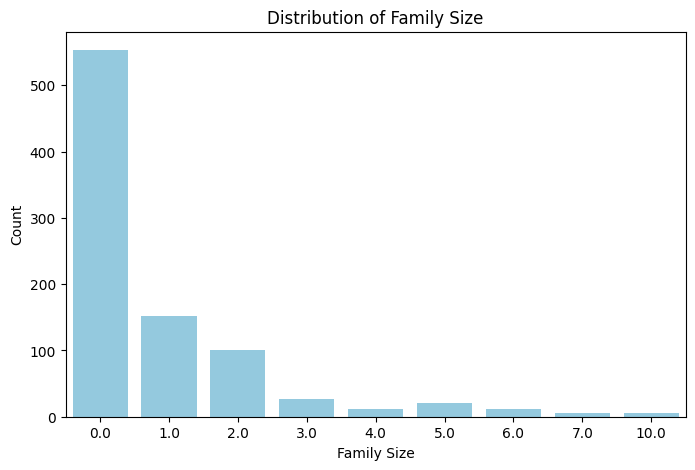

In [70]:
plt.figure(figsize=(8, 5))
sns.countplot(data=titanic_df, x='FamilySize', color='skyblue')
plt.title('Distribution of Family Size')
plt.xlabel('Family Size')
plt.ylabel('Count')
plt.show()

## Age Group: 
Create a new feature 'AgeGroup' by categorizing passengers into different age groups.

In [71]:
age_bins = [0, 18, 30, 50, 100]
age_labels = ['Child', 'Young Adult', 'Adult', 'Senior']

In [72]:
titanic_df['AgeGroup'] = pd.cut(titanic_df['Age'], bins=age_bins, labels=age_labels)
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize,AgeGroup
0,1.0,0,3,"Braund, Mr. Owen Harris",male,22.000000,1.0,0,A/5 21171,7.2500,Unknown,S,Mr,1.0,Young Adult
1,2.0,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1.0,0,PC 17599,71.2833,C85,C,Mrs,1.0,Adult
2,3.0,1,3,"Heikkinen, Miss. Laina",female,26.000000,0.0,0,STON/O2. 3101282,7.9250,Unknown,S,Miss,0.0,Young Adult
3,4.0,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1.0,0,113803,53.1000,C123,S,Mrs,1.0,Adult
4,5.0,0,3,"Allen, Mr. William Henry",male,35.000000,0.0,0,373450,8.0500,Unknown,S,Mr,0.0,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887.0,0,2,"Montvila, Rev. Juozas",male,27.000000,0.0,0,211536,13.0000,Unknown,S,Rev,0.0,Young Adult
887,888.0,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0.0,0,112053,30.0000,B42,S,Miss,0.0,Young Adult
888,889.0,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1.0,2,W./C. 6607,23.4500,Unknown,S,Miss,3.0,Young Adult
889,NaN,1,1,NaN,male,29.699118,0.0,0,NaN,14.4000,C148,C,NaN,0.0,Young Adult


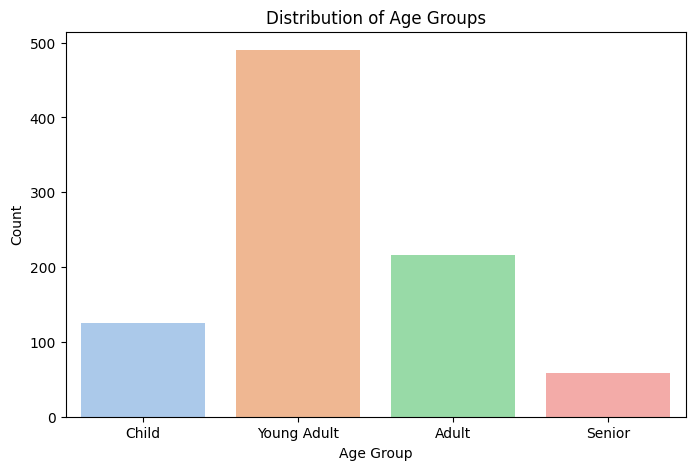

In [73]:
plt.figure(figsize=(8, 5))
sns.countplot(data=titanic_df, x='AgeGroup', order=age_labels, palette='pastel')
plt.title('Distribution of Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

## Fare Category: 
Create a new feature 'FareCategory' by categorizing passengers into different fare categories.

In [75]:
fare_bins = [0, 20, 40, 60, 80, 1000]
fare_labels = ['0-20', '20-40', '40-60', '60-80', '80+']

In [76]:
titanic_df['FareCategory'] = pd.cut(titanic_df['Fare'], bins=fare_bins, labels=fare_labels)

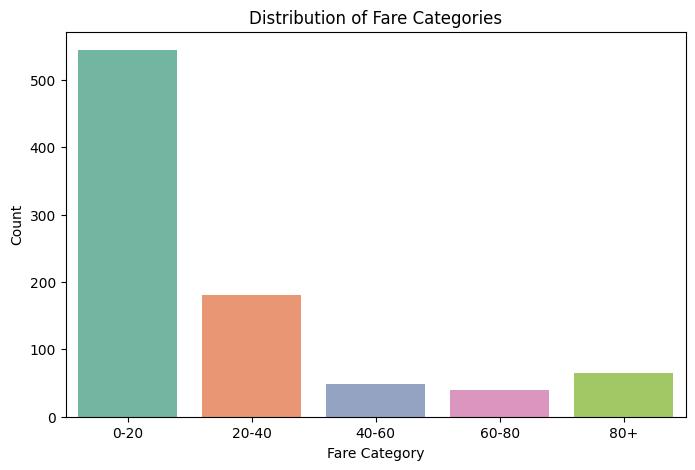

In [77]:
plt.figure(figsize=(8, 5))
sns.countplot(data=titanic_df, x='FareCategory', order=fare_labels, palette='Set2')
plt.title('Distribution of Fare Categories')
plt.xlabel('Fare Category')
plt.ylabel('Count')
plt.show()